# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import svm, preprocessing, neighbors, datasets, model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('busiest_airline_delays.csv')

# Preprocessing

In [3]:
data.nunique()

MONTH                              1
DAY_OF_WEEK                        7
DEP_DEL15                          2
DISTANCE_GROUP                    11
DEP_BLOCK                          6
SEGMENT_NUMBER                    11
CONCURRENT_FLIGHTS               206
NUMBER_OF_SEATS                   70
CARRIER_NAME                      16
AIRPORT_FLIGHTS_MONTH              5
AIRLINE_FLIGHTS_MONTH             16
AIRLINE_AIRPORT_FLIGHTS_MONTH     63
AVG_MONTHLY_PASS_AIRPORT           5
AVG_MONTHLY_PASS_AIRLINE          16
FLT_ATTENDANTS_PER_PASS           13
GROUND_SERV_PER_PASS              16
PLANE_AGE                         32
DEPARTING_AIRPORT                  5
LATITUDE                           5
LONGITUDE                          5
PREVIOUS_AIRPORT                 285
PRCP                              35
SNOW                               8
SNWD                               3
TMAX                              43
AWND                              56
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120894 entries, 0 to 120893
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          120894 non-null  int64  
 1   DAY_OF_WEEK                    120894 non-null  int64  
 2   DEP_DEL15                      120894 non-null  int64  
 3   DISTANCE_GROUP                 120894 non-null  int64  
 4   DEP_BLOCK                      120894 non-null  object 
 5   SEGMENT_NUMBER                 120894 non-null  int64  
 6   CONCURRENT_FLIGHTS             120894 non-null  int64  
 7   NUMBER_OF_SEATS                120894 non-null  int64  
 8   CARRIER_NAME                   120894 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          120894 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          120894 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  120894 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [5]:
data.describe()

MONTH    DAY_OF_WEEK      DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
count  120894.0  120894.000000  120894.000000   120894.000000   120894.000000   
mean        1.0       3.942677       0.149710        3.353525        3.211152   
std         0.0       1.910102       0.356788        1.855241        1.718627   
min         1.0       1.000000       0.000000        1.000000        1.000000   
25%         1.0       2.000000       0.000000        2.000000        2.000000   
50%         1.0       4.000000       0.000000        3.000000        3.000000   
75%         1.0       5.000000       0.000000        4.000000        4.000000   
max         1.0       7.000000       1.000000       11.000000       11.000000   

       CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
count       120894.000000    120894.000000          120894.000000   
mean           177.968783       127.222674           24984.998114   
std             52.524855        50.946997            4667.824038   
min              1.000000        44.000000           19902.000000   
25%            156.000000        76.000000           20193.000000   
50%            182.000000       142.000000           23873.000000   
75%            213.000000       172.000000           32102.000000   
max            286.000000       337.000000           32102.000000   

       AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
count          120894.000000                  120894.000000  ...   
mean            58978.630974                    7537.814565  ...   
std             27722.923436                    6050.361247  ...   
min              7688.000000                       1.000000  ...   
25%             25366.000000                    3787.000000  ...   
50%             69699.000000                    5347.000000  ...   
75%             80026.000000                   11786.000000  ...   
max            107849.000000                   19461.000000  ...   

       FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS      PLANE_AGE  \
count            120894.000000         120894.000000  120894.000000   
mean                  0.000612              0.000723      11.730557   
std                   0.000532              0.000263       7.522912   
min                   0.000000              0.000033       0.000000   
25%                   0.000170              0.000492       4.000000   
50%                   0.000504              0.000792      13.000000   
75%                   0.000768              0.000911      18.000000   
max                   0.001759              0.001265      32.000000   

            LATITUDE      LONGITUDE           PRCP           SNOW  \
count  120894.000000  120894.000000  120894.000000  120894.000000   
mean       36.489558     -90.471664       0.126495       0.042920   
std         3.600088       8.318211       0.307733       0.262952   
min        32.894000    -104.880000       0.000000       0.000000   
25%        33.641000     -97.030000       0.000000       0.000000   
50%        35.219000     -87.906000       0.000000       0.000000   
75%        39.774000     -84.427000       0.020000       0.000000   
max        41.978000     -80.936000       1.910000       3.100000   

                SNWD           TMAX           AWND  
count  120894.000000  120894.000000  120894.000000  
mean        0.144341      51.493838       8.819766  
std         0.486133      11.645643       3.449294  
min         0.000000      19.000000       2.680000  
25%         0.000000      42.000000       6.040000  
50%         0.000000      53.000000       8.050000  
75%         0.000000      60.000000      11.180000  
max         2.000000      79.000000      25.050000  

[8 rows x 22 columns]

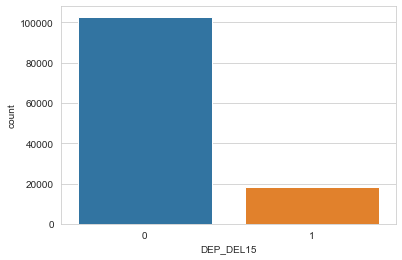

In [6]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [7]:
data = data.drop_duplicates()
data = data.drop(columns=['MONTH','LATITUDE','LONGITUDE'])
data.head()

DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  SEGMENT_NUMBER  \
0            3          0               5        MORNING               1   
1            3          0               3        MORNING               1   
2            3          0               9        MORNING               1   
3            3          0               1  EARLY_MORNING               1   
4            3          0               2        MORNING               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                 229              142   United Air Lines Inc.   
1                 229              120   United Air Lines Inc.   
2                 229              142   United Air Lines Inc.   
3                   4              128  American Airlines Inc.   
4                 229               50   SkyWest Airlines Inc.   

   AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  ...  FLT_ATTENDANTS_PER_PASS  \
0                  32102                  48104  ...                 0.001402   
1                  32102                  48104  ...                 0.001402   
2                  32102                  48104  ...                 0.001402   
3                  32102                  75591  ...                 0.000504   
4                  32102                  69699  ...                 0.000170   

   GROUND_SERV_PER_PASS  PLANE_AGE  DEPARTING_AIRPORT  PREVIOUS_AIRPORT  PRCP  \
0              0.001265         19  Atlanta Municipal              NONE   0.0   
1              0.001265         22  Atlanta Municipal              NONE   0.0   
2              0.001265         24  Atlanta Municipal              NONE   0.0   
3              0.000911         20  Atlanta Municipal              NONE   0.0   
4              0.000492         21  Atlanta Municipal              NONE   0.0   

  SNOW SNWD  TMAX  AWND  
0  0.0  0.0  72.0  4.47  
1  0.0  0.0  72.0  4.47  
2  0.0  0.0  72.0  4.47  
3  0.0  0.0  72.0  4.47  
4  0.0  0.0  72.0  4.47  

[5 rows x 23 columns]

# Label encoder and oversampling

In [8]:
label_encoder = preprocessing.LabelEncoder()
data['DEP_BLOCK']= label_encoder.fit_transform(data['DEP_BLOCK'])
data['CARRIER_NAME']= label_encoder.fit_transform(data['CARRIER_NAME'])
data['DEPARTING_AIRPORT']= label_encoder.fit_transform(data['DEPARTING_AIRPORT'])
data['PREVIOUS_AIRPORT']= label_encoder.fit_transform(data['PREVIOUS_AIRPORT'])

In [9]:
data["CONCURRENT_FLIGHTS"] = data["CONCURRENT_FLIGHTS"].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119731 entries, 0 to 120893
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DAY_OF_WEEK                    119731 non-null  int64  
 1   DEP_DEL15                      119731 non-null  int64  
 2   DISTANCE_GROUP                 119731 non-null  int64  
 3   DEP_BLOCK                      119731 non-null  int32  
 4   SEGMENT_NUMBER                 119731 non-null  int64  
 5   CONCURRENT_FLIGHTS             119731 non-null  int64  
 6   NUMBER_OF_SEATS                119731 non-null  int64  
 7   CARRIER_NAME                   119731 non-null  int32  
 8   AIRPORT_FLIGHTS_MONTH          119731 non-null  int64  
 9   AIRLINE_FLIGHTS_MONTH          119731 non-null  int64  
 10  AIRLINE_AIRPORT_FLIGHTS_MONTH  119731 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRPORT       119731 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRLINE      

# Graph

## DAY_OF_WEEK

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DAY_OF_WEEK'>

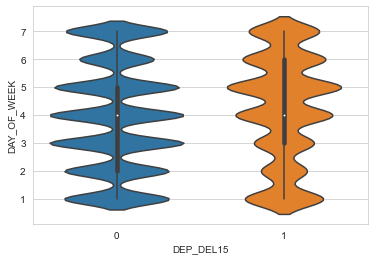

In [35]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DAY_OF_WEEK)

## DISTANCE_GROUP

In [11]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DISTANCE_GROUP)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DISTANCE_GROUP'>

In [12]:
data["DISTANCE_GROUP"].value_counts()

3     32847
2     25883
4     19861
1     16585
5      9621
7      5746
6      5115
8      2143
9      1259
11      400
10      271
Name: DISTANCE_GROUP, dtype: int64

In [13]:
DISTANCE_GROUP = pd.crosstab(index=data["DISTANCE_GROUP"], 
                           columns=data["DEP_DEL15"])
DISTANCE_GROUP

DEP_DEL15           0     1
DISTANCE_GROUP             
1               13966  2619
2               22088  3795
3               28229  4618
4               16860  3001
5                8077  1544
6                4182   933
7                4842   904
8                1813   330
9                1063   196
10                231    40
11                321    79

## DEP_BLOCK

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DEP_BLOCK'>

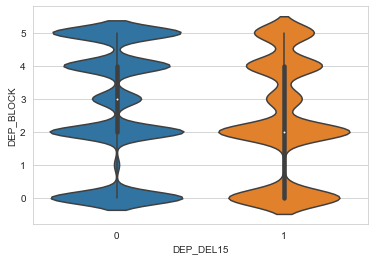

In [14]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DEP_BLOCK)

## SEGMENT_NUMBER

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SEGMENT_NUMBER'>

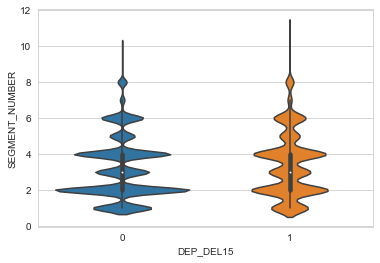

In [15]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SEGMENT_NUMBER)

In [16]:
data["SEGMENT_NUMBER"].value_counts()

2     37066
4     27462
1     16438
3     15374
6     12049
5      7313
8      2608
7      1334
10       54
9        32
11        1
Name: SEGMENT_NUMBER, dtype: int64

## CONCURRENT_FLIGHTS

<AxesSubplot:xlabel='DEP_DEL15', ylabel='CONCURRENT_FLIGHTS'>

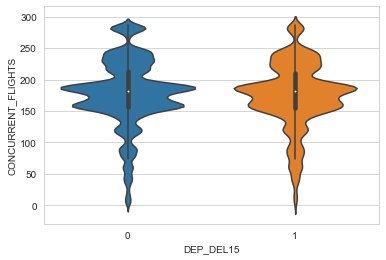

In [17]:
sns.violinplot(x=data.DEP_DEL15 , y=data.CONCURRENT_FLIGHTS)

In [18]:
CF = pd.crosstab(index=data["CONCURRENT_FLIGHTS"], columns=data["DEP_DEL15"])
CFmin = CF[(CF[1]+CF[0])<100]
CFmin

DEP_DEL15            0   1
CONCURRENT_FLIGHTS        
1                    3   2
2                    8   0
3                   71   1
5                   57   8
8                   23   1
9                    8   1
11                  10   1
12                  48  11
13                  40  11
14                  39  16
18                  17   1
21                  20   1
22                  74  11
23                  78  14
33                  50  16
37                  25  12
43                  78   8
47                  67  27
48                  84  12
49                  39  10
50                  50   0
53                  29  24
55                  55   0
58                  57   1
64                  46  18
67                  52  15
74                  64  10
76                  58  18
77                  60  17
82                  49  33
85                  42  43
86                  77   9
94                   7  87
98                  85  13
99                  81  18

## NUMBER_OF_SEATS

In [19]:
sns.violinplot(x=data.DEP_DEL15 , y=data.NUMBER_OF_SEATS)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='NUMBER_OF_SEATS'>

In [20]:
NOS = pd.crosstab(index=data["NUMBER_OF_SEATS"], columns=data["DEP_DEL15"])
NOSmin = NOS[(NOS[1]+NOS[0])<100]
NOSmin

DEP_DEL15         0   1
NUMBER_OF_SEATS        
65               23   7
119              10   1
146              28  11
168               2   0
170               1   1
188              61  31
196              88   9
198              28   8
200              48  15
208              19   7
209              10  11
211               3   2
219              21   9
246               4   1
247              69  17
267               3   1
288              38   9
293              55  12
304               0   1
306               1   0
337               2   0

In [21]:
len(NOSmin)

21

## AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AVG_MONTHLY_PASS_AIRLINE'>

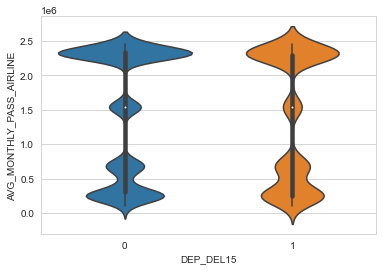

In [22]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AVG_MONTHLY_PASS_AIRLINE)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='FLT_ATTENDANTS_PER_PASS'>

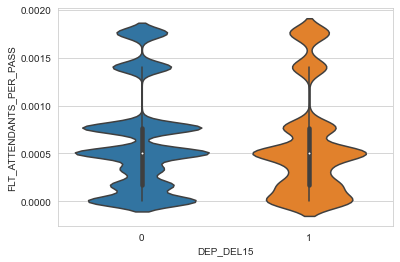

In [23]:
sns.violinplot(x=data.DEP_DEL15 , y=data.FLT_ATTENDANTS_PER_PASS)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='GROUND_SERV_PER_PASS'>

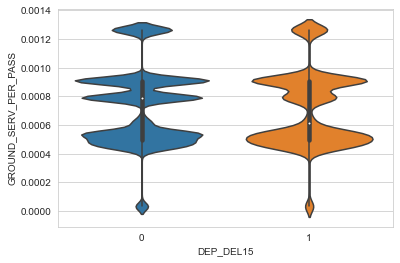

In [24]:
sns.violinplot(x=data.DEP_DEL15 , y=data.GROUND_SERV_PER_PASS)

In [25]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PLANE_AGE)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PLANE_AGE'>

In [26]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PREVIOUS_AIRPORT)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PREVIOUS_AIRPORT'>

In [27]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PRCP)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PRCP'>

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SNOW'>

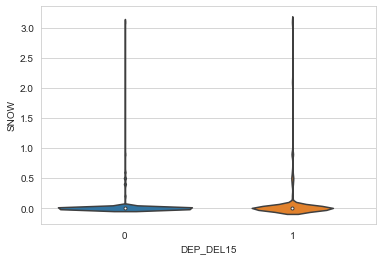

In [28]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SNOW)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SNWD'>

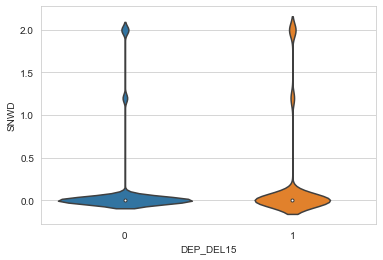

In [29]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SNWD)

In [30]:
sns.violinplot(x=data.DEP_DEL15 , y=data.TMAX)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='TMAX'>

In [31]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AWND)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AWND'>

## AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIRLINE_AIRPORT_FLIGHTS_MONTH'>

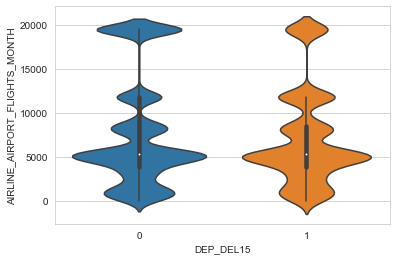

In [32]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AIRLINE_AIRPORT_FLIGHTS_MONTH)

## AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AVG_MONTHLY_PASS_AIRLINE'>

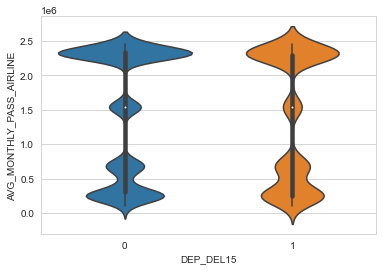

In [33]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AVG_MONTHLY_PASS_AIRLINE)